In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%config InlineBackend.figure_formats = ['svg']
colors = sns.color_palette("Set2")

In [8]:
with open('/local/home/lbiggio/USAM/geneal/outputs/2023-01-09/13-15-20/res_matrix_sensing.pkl', 'rb') as f:
    results = pickle.load(f)
    
etas = results['etas']
rhos = results['rhos']
f_star = results['f_star']
#d = results['d']
problem = 'baseline'


error_mean_SGD_SGD_SDE = results['error_mean_SGD_SGD_SDE']
error_std_SGD_SGD_SDE = results['error_std_SGD_SGD_SDE']

error_mean_USAM_SGD_SDE = results['error_mean_USAM_SGD_SDE']
error_std_USAM_SGD_SDE = results['error_std_USAM_SGD_SDE']

error_mean_USAM_USAM_SDE = results['error_mean_USAM_USAM_SDE']
error_std_USAM_USAM_SDE = results['error_std_USAM_USAM_SDE']

error_mean_SAM_SGD_SDE = results['error_mean_SAM_SGD_SDE']
error_std_SAM_SGD_SDE = results['error_std_SAM_SGD_SDE']

error_mean_SAM_SAM_SDE = results['error_mean_SAM_SAM_SDE']
error_std_SAM_SAM_SDE = results['error_std_SAM_SAM_SDE']

<IPython.core.display.Javascript object>


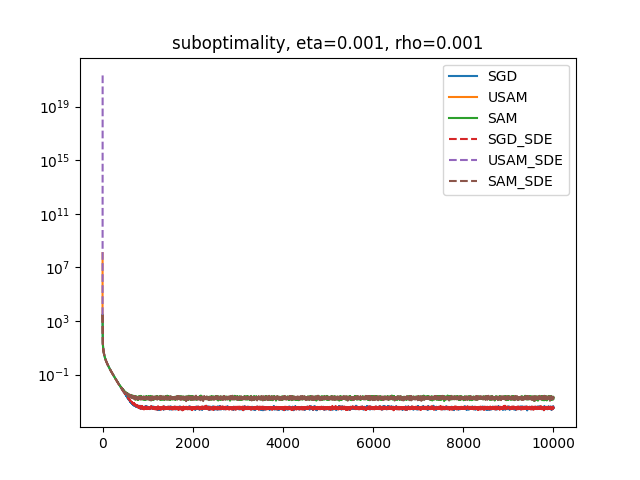

<IPython.core.display.Javascript object>


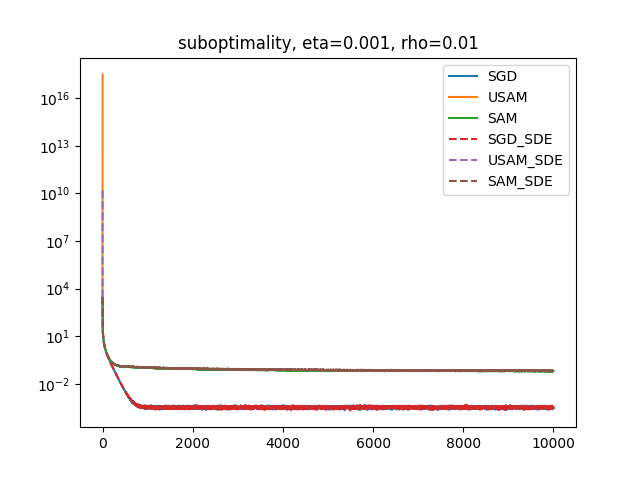

<IPython.core.display.Javascript object>


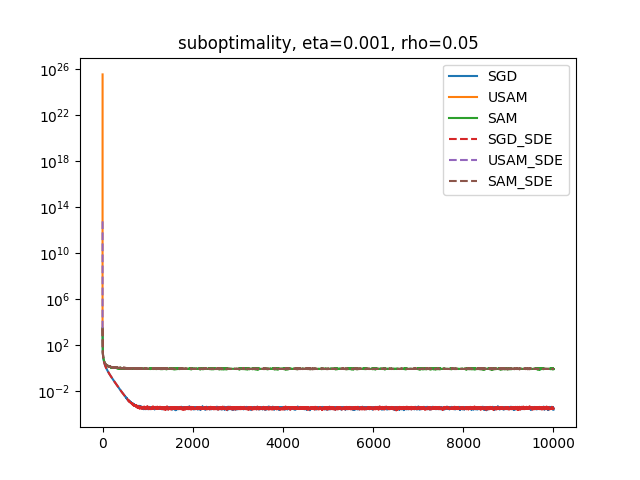

<IPython.core.display.Javascript object>


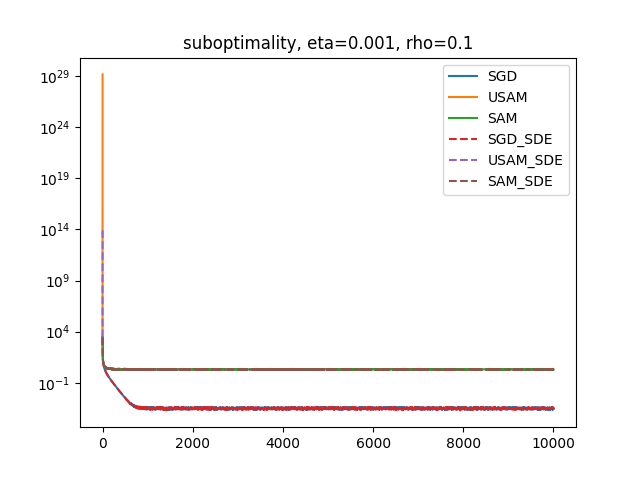

In [9]:
%matplotlib notebook
# plotting loss just to be sure we are converging
# using just smallest 
for idx_eta in range(len(etas)):
  eta = etas[idx_eta]
  for idx_rho in range(len(rhos)):
    plt.figure()
    rho = rhos[idx_rho]
    plt.plot(results['loss_all_SGD'][idx_eta, idx_rho,:]-f_star,label='SGD')
    plt.plot(results['loss_all_USAM'][idx_eta, idx_rho,:]-f_star,label='USAM')
    plt.plot(results['loss_all_SAM'][idx_eta, idx_rho,:]-f_star,label='SAM')
    plt.plot(results['loss_all_SGD_SDE'][idx_eta, idx_rho,:]-f_star,'--',label='SGD_SDE')
    plt.plot(results['loss_all_USAM_SDE'][idx_eta, idx_rho,:]-f_star,'--',label='USAM_SDE')
    plt.plot(results['loss_all_SAM_SDE'][idx_eta, idx_rho,:]-f_star,'--',label='SAM_SDE')
    plt.title('suboptimality, eta='+str(eta)+', rho='+str(rho))
    plt.yscale('log', nonposy='clip')
    plt.legend()
    plt.show()


<IPython.core.display.Javascript object>


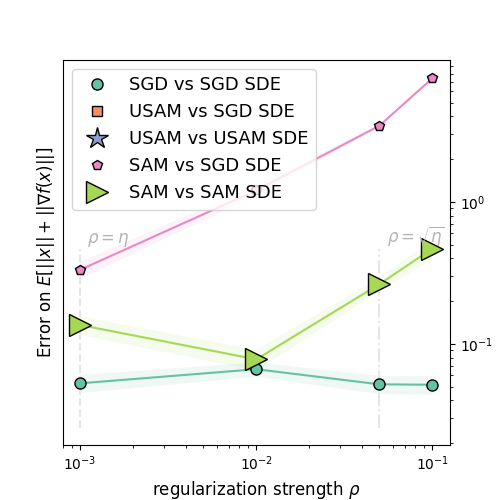

In [10]:
# plotting approximation error
fig = plt.figure()
ax = fig.add_subplot()
min_error = min(min(np.min(error_mean_SGD_SGD_SDE),np.min(error_mean_USAM_SGD_SDE)),np.min(error_mean_USAM_USAM_SDE),np.min(error_mean_SAM_SAM_SDE))
max_error = max(max(np.max(error_mean_SGD_SGD_SDE),np.max(error_mean_USAM_SGD_SDE)),np.max(error_mean_USAM_USAM_SDE),np.max(error_mean_SAM_SAM_SDE))

plt.plot([rhos[0], rhos[0]],[0.5*min_error, max_error],'--',color=[0.9,0.9,0.9])
plt.plot([rhos[2], rhos[2]],[0.5*min_error, max_error],'-.',color=[0.9,0.9,0.9])
plt.text(1.1*rhos[0],1.1*max_error,r'$\rho =\eta$',color=[0.7,0.7,0.7], fontsize=12)
plt.text(1.1*rhos[2],1.1*max_error,r'$\rho =\sqrt{\eta}$',color=[0.7,0.7,0.7], fontsize=12)

plt.plot(rhos, error_mean_SGD_SGD_SDE.T,'-', color = colors[0])
plt.fill_between(rhos,np.squeeze(error_mean_SGD_SGD_SDE.T-error_std_SGD_SGD_SDE.T), np.squeeze(error_mean_SGD_SGD_SDE.T+error_std_SGD_SGD_SDE.T), alpha=0.1, fc=colors[0])
plt.plot(rhos, error_mean_SGD_SGD_SDE.T,'.', markersize=16,label='SGD vs SGD SDE', color = colors[0],markeredgewidth=1, markeredgecolor='k')

plt.plot(rhos, error_mean_USAM_SGD_SDE.T,'-', color = colors[1])
plt.fill_between(rhos,np.squeeze(error_mean_USAM_SGD_SDE.T-error_std_USAM_SGD_SDE.T), np.squeeze(error_mean_USAM_SGD_SDE.T+error_std_USAM_SGD_SDE.T), alpha=0.1, fc=colors[1])
plt.plot(rhos, error_mean_USAM_SGD_SDE.T,'s', markersize=7, label='USAM vs SGD SDE', color = colors[1],markeredgewidth=1, markeredgecolor='k')

plt.plot(rhos,error_mean_USAM_USAM_SDE.T,'-', color = colors[2])
plt.fill_between(rhos,np.squeeze(error_mean_USAM_USAM_SDE.T-error_std_USAM_USAM_SDE.T), np.squeeze(error_mean_USAM_USAM_SDE.T+error_std_USAM_USAM_SDE.T), alpha=0.1, fc=colors[2])
plt.plot(rhos,error_mean_USAM_USAM_SDE.T,'*', markersize=16, label='USAM vs USAM SDE', color = colors[2],markeredgewidth=1, markeredgecolor='k')

plt.plot(rhos,error_mean_SAM_SGD_SDE.T,'-', color = colors[3])
plt.fill_between(rhos,np.squeeze(error_mean_SAM_SGD_SDE.T-error_std_SAM_SGD_SDE.T), np.squeeze(error_mean_SAM_SGD_SDE.T+error_std_SAM_SGD_SDE.T), alpha=0.1, fc=colors[3])
plt.plot(rhos, error_mean_SAM_SGD_SDE.T,'p', markersize=7, label='SAM vs SGD SDE', color = colors[3],markeredgewidth=1, markeredgecolor='k')

plt.plot(rhos,error_mean_SAM_SAM_SDE.T,'-', color = colors[4])
plt.fill_between(rhos,np.squeeze(error_mean_SAM_SAM_SDE.T-error_std_SAM_SAM_SDE.T), np.squeeze(error_mean_SAM_SAM_SDE.T+error_std_SAM_SAM_SDE.T), alpha=0.1, fc=colors[4])
plt.plot(rhos,error_mean_SAM_SAM_SDE.T,'>', markersize=16, label='SAM vs SAM SDE', color = colors[4],markeredgewidth=1, markeredgecolor='k')

plt.legend(fontsize=13,loc='upper left')
#plt.title(problem+r" ($d = "+str(d)+r"$), $\eta = "+str(eta)+r"$",fontsize=13)
plt.ylabel(r"Error on $E[\||x\|| +\||\nabla f(x)\||]$",fontsize=12)
plt.xlabel(r"regularization strength $\rho$",fontsize=12)
ax.yaxis.tick_right()
plt.yscale("log")
plt.xscale("log")
fig = plt.gcf()
fig.set_size_inches(5, 5)
name_file = problem+'_SAM_USAM_error.pdf'
plt.savefig(name_file, format="pdf", bbox_inches="tight")